In [ ]:
Dataset Regresión Logística – Heart Disease Cleveland UCI


Jose Miguel Cruz Segura 


#202016908_84

In [1]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
Datos2 = pd.read_csv('C:/Users/ASUS-PC/OneDrive/Documentos/fase3/ANÁLISIS_DE_DATOS/Anexo3_Dataset_Heart_DiseaseClevelandUCI/heart_cleveland_upload.csv')

In [30]:
Datos2.head(40)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [31]:
Datos2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [32]:
print(Datos2.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')


Text(0.5, 1.0, 'Identificacion de Datos Faltantes y atipicos')

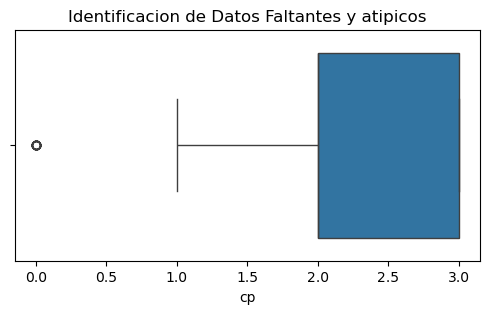

In [11]:
#Identificacion de Datos Faltantes y atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos2['cp'])
plt.title('Identificacion de Datos Faltantes y atipicos') 


In [12]:
#

cantidad de registros con cero en edad 0
cantidad de registros con cero en Sexo del paciente 96
cantidad de registros con cero en Tipo de dolor 23
cantidad de registros con cero en Presión arterial 0
cantidad de registros con cero en Nivel de colesterol  0
cantidad de registros con cero en Azúcar en sangre 254
cantidad de registros con cero en Resultados del electrocardiograma 147
cantidad de registros con cero en Frecuencia cardíaca 0
cantidad de registros con cero en Angina inducida 200
cantidad de registros con cero en Depresión del ST inducida 96
cantidad de registros con cero en Pendiente del segmento ST 139
cantidad de registros con cero en Número de vasos principales coloreados por fluoroscopia 174
cantidad de registros con cero en Estado de talasemia 164
cantidad de registros con cero en Resultado objetivo 160


In [13]:
#reemplazar todos los ceros con el valor medio (promedio)

Datos2['sex']=Datos2['sex'].replace(0,Datos2['sex'].mean())
Datos2['cp']=Datos2['cp'].replace(0,Datos2['cp'].mean())
Datos2['fbs']=Datos2['fbs'].replace(0,Datos2['fbs'].mean())
Datos2['restecg']=Datos2['restecg'].replace(0,Datos2['restecg'].mean())
Datos2['exang']=Datos2['exang'].replace(0,Datos2['exang'].mean())
Datos2['oldpeak']=Datos2['oldpeak'].replace(0,Datos2['oldpeak'].mean())
Datos2['slope']=Datos2['slope'].replace(0,Datos2['slope'].mean())
Datos2['ca']=Datos2['ca'].replace(0,Datos2['ca'].mean())
Datos2['thal']=Datos2['thal'].replace(0,Datos2['thal'].mean())
Datos2['condition']=Datos2['condition'].replace(0,Datos2['condition'].mean())

In [14]:
#revision 
print("cantidad de registros con cero en edad", Datos2['age'].isin([0]).sum())
print("cantidad de registros con cero en Sexo del paciente", Datos2['sex'].isin([0]).sum())
print("cantidad de registros con cero en Tipo de dolor", Datos2['cp'].isin([0]).sum())
print("cantidad de registros con cero en Presión arterial", Datos2['trestbps'].isin([0]).sum())
print("cantidad de registros con cero en Nivel de colesterol ", Datos2['chol'].isin([0]).sum())
print("cantidad de registros con cero en Azúcar en sangre", Datos2['fbs'].isin([0]).sum())
print("cantidad de registros con cero en Resultados del electrocardiograma", Datos2['restecg'].isin([0]).sum())
print("cantidad de registros con cero en Frecuencia cardíaca", Datos2['thalach'].isin([0]).sum())
print("cantidad de registros con cero en Angina inducida", Datos2['exang'].isin([0]).sum())
print("cantidad de registros con cero en Depresión del ST inducida", Datos2['oldpeak'].isin([0]).sum())
print("cantidad de registros con cero en Pendiente del segmento ST", Datos2['slope'].isin([0]).sum())
print("cantidad de registros con cero en Número de vasos principales coloreados por fluoroscopia", Datos2['ca'].isin([0]).sum())
print("cantidad de registros con cero en Estado de talasemia", Datos2['thal'].isin([0]).sum())
print("cantidad de registros con cero en Resultado objetivo", Datos2['condition'].isin([0]).sum())

cantidad de registros con cero en edad 0
cantidad de registros con cero en Sexo del paciente 0
cantidad de registros con cero en Tipo de dolor 0
cantidad de registros con cero en Presión arterial 0
cantidad de registros con cero en Nivel de colesterol  0
cantidad de registros con cero en Azúcar en sangre 0
cantidad de registros con cero en Resultados del electrocardiograma 0
cantidad de registros con cero en Frecuencia cardíaca 0
cantidad de registros con cero en Angina inducida 0
cantidad de registros con cero en Depresión del ST inducida 0
cantidad de registros con cero en Pendiente del segmento ST 0
cantidad de registros con cero en Número de vasos principales coloreados por fluoroscopia 0
cantidad de registros con cero en Estado de talasemia 0
cantidad de registros con cero en Resultado objetivo 0


Text(0.5, 1.0, 'Identificacion de Datos Faltantes y atipicos')

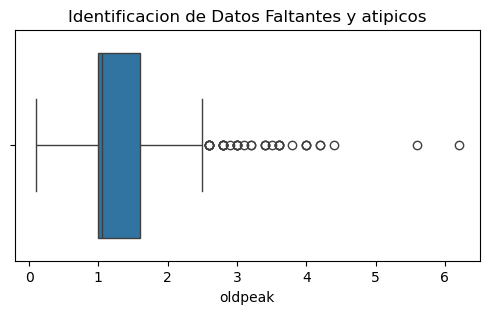

In [16]:
#Identificacion de datos atipicos 
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos2['oldpeak'])
plt.title('Identificacion de Datos Faltantes y atipicos') 

In [17]:
#conteo de datos atipicos 

nivel_minimo=20
nivel_maximo=800
Total_Atipicos=((Datos2['oldpeak']<nivel_minimo)|(Datos2['oldpeak']>nivel_maximo)).sum()
print("El total de valores atipicos es:{}".format(Total_Atipicos))

El total de valores atipicos es:297


In [19]:
Datos2=Datos2[(Datos2['oldpeak']<nivel_maximo)&(Datos2['oldpeak']>nivel_minimo)]

In [20]:
Total_Atipicos=((Datos2['oldpeak']<nivel_minimo)|(Datos2['oldpeak']>nivel_maximo)).sum()
print("El total de valores atipicos es:{}".format(Total_Atipicos))

El total de valores atipicos es:0


In [22]:
#revision de tipo de datos faltantes 
Datos2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        0 non-null      int64  
 1   sex        0 non-null      float64
 2   cp         0 non-null      float64
 3   trestbps   0 non-null      int64  
 4   chol       0 non-null      int64  
 5   fbs        0 non-null      float64
 6   restecg    0 non-null      float64
 7   thalach    0 non-null      int64  
 8   exang      0 non-null      float64
 9   oldpeak    0 non-null      float64
 10  slope      0 non-null      float64
 11  ca         0 non-null      float64
 12  thal       0 non-null      float64
 13  condition  0 non-null      float64
dtypes: float64(10), int64(4)
memory usage: 0.0 bytes


In [34]:
#Total de personas con presion arterial

Datos2['exang'].value_counts()

exang
0    200
1     97
Name: count, dtype: int64

In [33]:
Datos2 [['exang']].head(40)

,exang
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,0
8,0
9,0


In [37]:
# se crean variables X y Y para almacenar informacion

X = Datos2.drop('cp',axis=1) # se cargan los datos de train sin los datos de la columna Car_Name
Y = Datos2['cp'] # se cargan los datos de train con los datos de la columna Car_Name

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [38]:
print (X_train)

     age  sex  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
159   68    1       144   193    1        0      141      0      3.4      1   
90    62    1       130   231    0        0      146      0      1.8      1   
269   48    1       130   256    1        2      150      1      0.0      0   
157   70    1       145   174    0        0      125      1      2.6      2   
198   60    1       130   206    0        2      132      1      2.4      1   
..   ...  ...       ...   ...  ...      ...      ...    ...      ...    ...   
251   53    0       130   264    0        2      143      0      0.4      1   
192   61    1       120   260    0        0      140      1      3.6      1   
117   52    1       172   199    1        0      162      0      0.5      0   
47    52    1       134   201    0        0      158      0      0.8      0   
172   65    1       120   177    0        0      140      0      0.4      0   

     ca  thal  condition  
159   2     2          1

In [39]:
# Convertir variables categóricas en variables numéricas mediante one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Volver a dividir los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Entrenar el modelo de regresión logística
modelo_regresion = LogisticRegression(solver='liblinear')
modelo_regresion.fit(X_train, Y_train)

# Realizar la predicción
Prediccion = modelo_regresion.predict(X_test)


In [40]:
print (Y_test)

111    2
150    2
12     0
216    3
139    2
      ..
27     1
218    3
256    3
37     1
92     2
Name: cp, Length: 75, dtype: int64


In [41]:
print (Prediccion)

[2 2 3 3 3 3 3 3 3 3 2 2 3 3 1 3 2 3 3 3 2 3 3 3 2 3 3 3 3 2 2 2 3 3 3 3 2
 3 2 3 3 3 3 2 3 3 3 3 3 2 2 1 1 3 1 3 3 3 2 3 3 2 2 1 3 3 1 2 2 3 2 2 2 2
 3]


In [42]:
#desempeño del modelo de regresion 

print (classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.33      0.18      0.24        11
           2       0.42      0.56      0.48        18
           3       0.71      0.82      0.76        39

    accuracy                           0.59        75
   macro avg       0.37      0.39      0.37        75
weighted avg       0.52      0.59      0.54        75



C:\Users\ASUS-PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS-PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS-PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


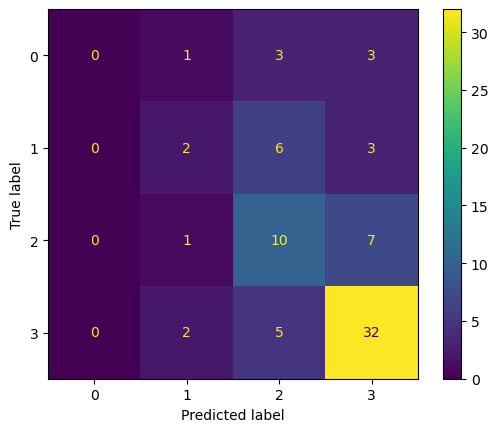

In [43]:
#Matrix de confusion de modelo
from sklearn import metrics  # Importar metrics desde sklearn

# Matriz de confusión del modelo
cm = confusion_matrix(Y_test, Prediccion)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

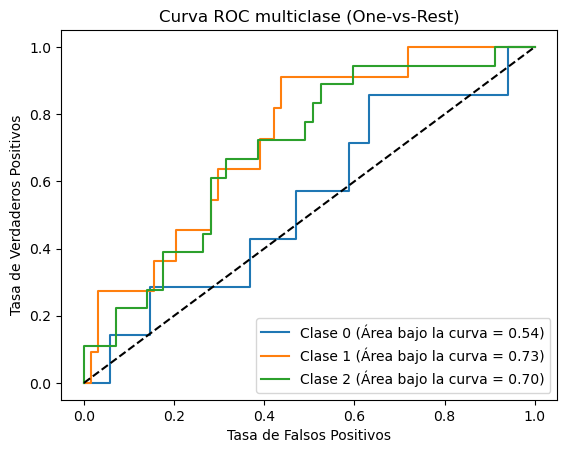

In [45]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Binarizar las etiquetas de clase para aplicar one-vs-rest
Y_binarized = label_binarize(Y_test, classes=[0, 1, 2])  # Cambia [0, 1, 2] a tus clases específicas
n_classes = Y_binarized.shape[1]

# Entrenar modelo en esquema one-vs-rest
modelo_regresion = OneVsRestClassifier(LogisticRegression(solver='liblinear'))
modelo_regresion.fit(X_train, label_binarize(Y_train, classes=[0, 1, 2]))  # Ajusta la binarización

# Obtener predicciones de probabilidad
Y_score = modelo_regresion.decision_function(X_test)

# Graficar la curva ROC para cada clase
fpr = {}
tpr = {}
roc_auc = {}

plt.figure()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_binarized[:, i], Y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"Clase {i} (Área bajo la curva = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC multiclase (One-vs-Rest)")
plt.legend(loc="best")
plt.show()
